# Outliers

Outliers are data points that deviate significantly from the typical distribution or pattern of the rest of the dataset. Outliers can arise due to various reasons, such as measurement errors, data entry mistakes, or genuine anomalies in the underlying data generation process. Identifying and handling outliers is crucial because they can exert an undue influence on model training and performance. Outliers can skew statistical measures, like mean and standard deviation, leading to inaccurate characterizations of the data. Moreover, machine learning algorithms, particularly those sensitive to data distribution, can be adversely affected by outliers, resulting in suboptimal model predictions. Therefore, effective outlier detection and appropriate strategies for treatment, which could include removal, transformation, or imputation, are essential to ensure the robustness and reliability of machine learning models.

Outliers need to be identified. It can be done in the following ways:

1. **Range and Limits:** We need to decide what will constitute an outlier. It can be done through the following ways:
    * Inter-Quartile Range
    * Standard Deviation
    * Visualized or domain limits
2. **Percentage:** Or we can set a percentage which we want to label as outliers and remove them. Remember, if a large percentage of data is outlier, then the data is  just distributed and is not outlier.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Creating a random dataset**

In [4]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    
    # Set a random seed in the same cell as the random call. The seed is set to 42 here. 
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals = 0)
    
    return sample_ages

In [5]:
sample = create_ages()
print(sample)

[56. 48. 58. 70. 47. 47. 71. 60. 44. 57. 44. 44. 53. 25. 28. 43. 37. 54.
 38. 32. 69. 47. 51. 31. 43. 51. 35. 55. 42. 46. 42. 74. 50. 36. 61. 34.
 53. 25. 33. 53. 60. 52. 48. 46. 31. 41. 44. 64. 54. 27. 54. 45. 41. 58.
 63. 62. 39. 46. 54. 63. 44. 48. 36. 34. 61. 68. 49. 63. 55. 42. 55. 70.
 50. 70. 16. 61. 51. 46. 51. 24. 47. 55. 69. 43. 39. 43. 62. 54. 43. 57.
 51. 63. 41. 46. 45. 31. 54. 53. 50. 47.]


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


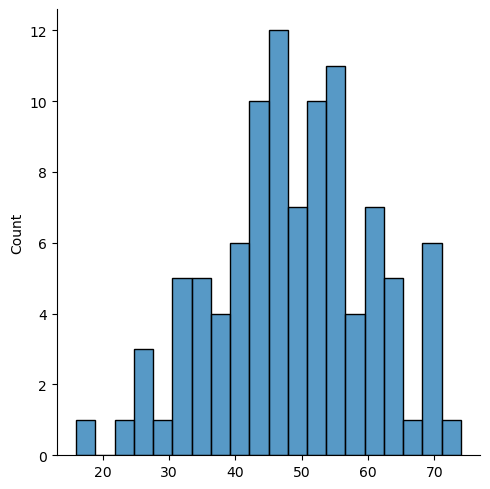

In [7]:
sns.displot(sample, bins=20)

# In the output below, we can visually see that ages below 20 are outliers

<Axes: >

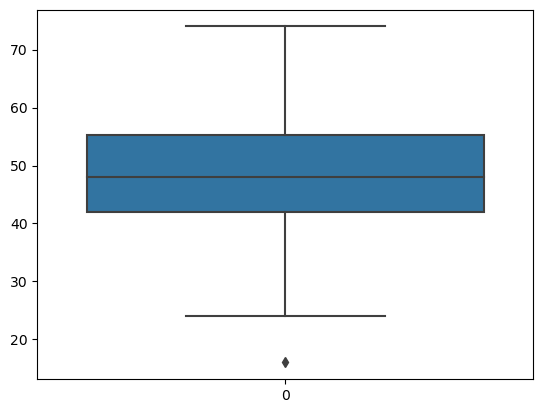

In [8]:
# It is also shown by the boxplot that ages<20 are outliers

sns.boxplot(sample)

In [11]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

**Applying IQR**

In [13]:
# Based on the above data, let's find out IQR

IQR = 55.25 - 42.00

# Now let's find the lower limit
lower_limit = 42 - (1.5*IQR)
print(lower_limit)

22.125


In [15]:
# Now we can get data that is greater than the lower limit
ser[ser>lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

**Doing it with a dataset**

In [18]:
df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')

df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

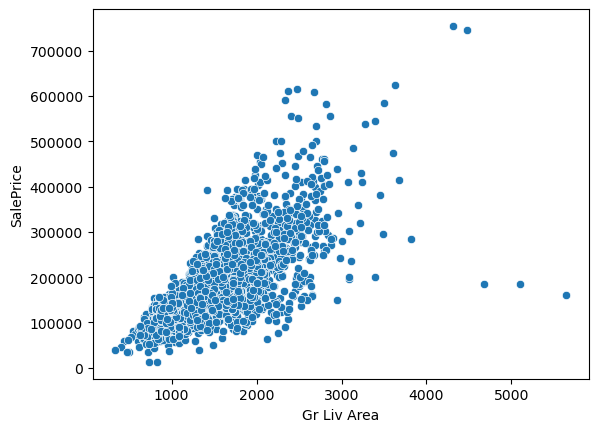

In [21]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice',data=df)

In [23]:
# Removing the outliers
df[(df['Gr Liv Area']>4000) & (df['SalePrice'])<40000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
